## Задание 1

In [37]:
import pandas as pd
from sklearn.datasets import load_digits

digits = load_digits()      # Загрузка датасета с цифрапми

# Преобразование в DataFrame
df = pd.DataFrame(digits.data, columns=digits.feature_names)
df['target'] = digits.target

# Просмотрим структуру данных
print(df.head())            # Первые 5 строк

print(df.isnull().sum())    # Проверка на пропуски

   pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0        0.0        0.0        5.0       13.0        9.0        1.0   
1        0.0        0.0        0.0       12.0       13.0        5.0   
2        0.0        0.0        0.0        4.0       15.0       12.0   
3        0.0        0.0        7.0       15.0       13.0        1.0   
4        0.0        0.0        0.0        1.0       11.0        0.0   

   pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_7  pixel_7_0  \
0        0.0        0.0        0.0        0.0  ...        0.0        0.0   
1        0.0        0.0        0.0        0.0  ...        0.0        0.0   
2        0.0        0.0        0.0        0.0  ...        0.0        0.0   
3        0.0        0.0        0.0        8.0  ...        0.0        0.0   
4        0.0        0.0        0.0        0.0  ...        0.0        0.0   

   pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  pixel_7_6  \
0        0.0        6.0       13.0       10.0

## Задание 2

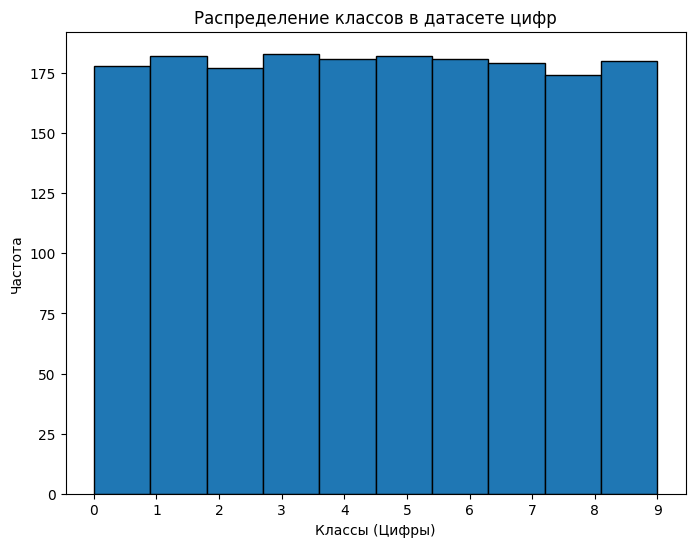

target
3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: count, dtype: int64


In [38]:
import matplotlib.pyplot as plt

# Построение гистограммы распределения классов
plt.figure(figsize=(8, 6))
plt.hist(df['target'], len((df['target'].unique())), edgecolor='black')
plt.xticks(df['target'].unique())  # Формируем метки для оси X из uniq targets
plt.title('Распределение классов в датасете цифр')
plt.xlabel('Классы (Цифры)')
plt.ylabel('Частота')
plt.show()

class_balance = df['target'].value_counts()     # Числовой вид
print(class_balance)


## Задание 3

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Определим признаки (X) и метки классов (y)
X = df.drop('target', axis=1)   # Датасет без столбца target
y = df['target']                # Столбец target
# Разделяем данные на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Это для сохранения баланса классов
)

# Масштабирование признаков (чтобы все признаки были в одном масштабе)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Задание 4

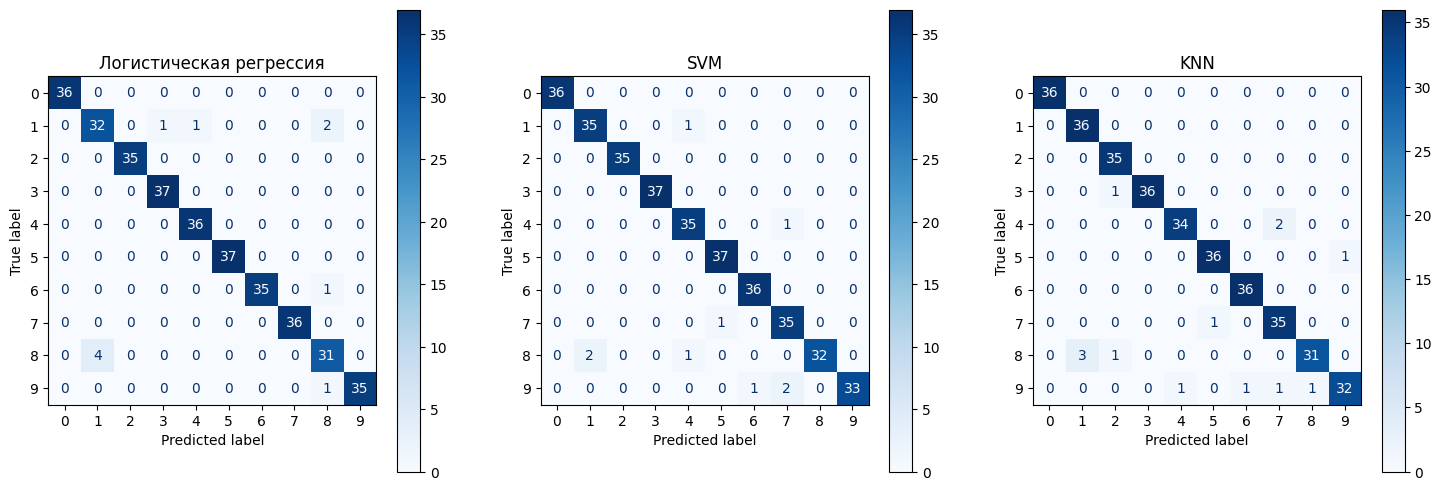

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay

# Логистическая регрессия
lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Построим матрицы ошибок для всех моделей
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Логистическая регрессия
ConfusionMatrixDisplay.from_estimator(lr_model, X_test, y_test, ax=ax[0], cmap='Blues')
ax[0].set_title('Логистическая регрессия')

# SVM
ConfusionMatrixDisplay.from_estimator(svm_model, X_test, y_test, ax=ax[1], cmap='Blues')
ax[1].set_title('SVM')

# KNN
ConfusionMatrixDisplay.from_estimator(knn_model, X_test, y_test, ax=ax[2], cmap='Blues')
ax[2].set_title('KNN')

plt.show()


## Задание 5

In [41]:
# Импортируем функцию classification_report для оценки
from sklearn.metrics import classification_report

# Логистическая регрессия
print("Логистическая регрессия:")
print(classification_report(y_test, y_pred_lr))

# SVM
print("SVM:")
print(classification_report(y_test, y_pred_svm))

# KNN
print("KNN:")
print(classification_report(y_test, y_pred_knn))


Логистическая регрессия:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.89      0.89      0.89        36
           2       1.00      1.00      1.00        35
           3       0.97      1.00      0.99        37
           4       0.97      1.00      0.99        36
           5       1.00      1.00      1.00        37
           6       1.00      0.97      0.99        36
           7       1.00      1.00      1.00        36
           8       0.89      0.89      0.89        35
           9       1.00      0.97      0.99        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

SVM:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.95      0.97      0.96        36
           2       1.00      1.00      1.00     

#### Сравнение метрик

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Собираем метрики для каждой модели
metrics = {
    'Model': ['Logistic Regression', 'SVM', 'KNN'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_knn)
    ],
    'Precision (macro)': [
        precision_score(y_test, y_pred_lr, average='macro'),
        precision_score(y_test, y_pred_svm, average='macro'),
        precision_score(y_test, y_pred_knn, average='macro')
    ],
    'Recall (macro)': [
        recall_score(y_test, y_pred_lr, average='macro'),
        recall_score(y_test, y_pred_svm, average='macro'),
        recall_score(y_test, y_pred_knn, average='macro')
    ],
    'F1-score (macro)': [
        f1_score(y_test, y_pred_lr, average='macro'),
        f1_score(y_test, y_pred_svm, average='macro'),
        f1_score(y_test, y_pred_knn, average='macro')
    ]
}

# Преобразуем метрики в DataFrame для удобного вывода
metrics_df = pd.DataFrame(metrics)

# Выводим результаты
print(metrics_df)

                 Model  Accuracy  Precision (macro)  Recall (macro)  \
0  Logistic Regression  0.972222           0.972126        0.971905   
1                  SVM  0.975000           0.975960        0.974762   
2                  KNN  0.963889           0.964590        0.963722   

   F1-score (macro)  
0          0.971940  
1          0.974847  
2          0.963440  
